In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

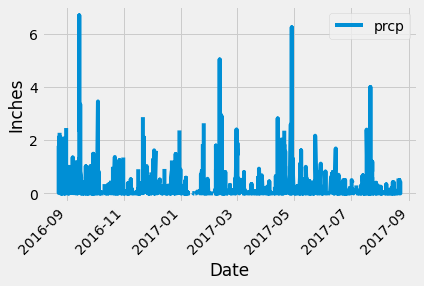

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
percipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").filter(measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(percipitation_data)

# Sort the dataframe by date
df['date'] = pd.to_datetime(df.date)
df.sort_values(by='date')

# sanity check 
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x ='date', rot=45, y='prcp')
plt.ylabel('Inches')
plt.xlabel('Date')

#show plot
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
round(df.describe(), 2)

,prcp
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()

#print station_count
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

#print results
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp  = session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()


# print results
print(f'The lowest temperature was {min_temp}, max temp was {max_temp}, and the average temperature was {avg_temp}.')

The lowest temperature was [(54.0,)], max temp was [(85.0,)], and the average temperature was [(71.66378066378067,)].


Text(0.5, 0, 'Temperature')

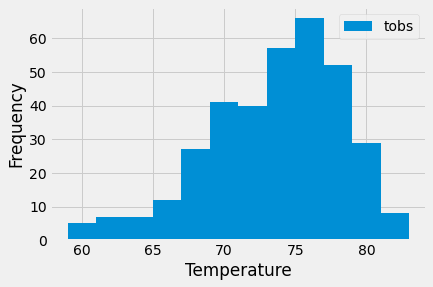

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.date, measurement.tobs).filter(measurement.date >= "2016-08-24").filter(measurement.date <= "2017-08-23", measurement.station == most_active).all()

#convert to DF
temp_df = pd.DataFrame(temp_data)

# show plot
temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [16]:
# Close Session
session.close()